# Clustering

## Introduction
In this section, we will perform clustering on the Iris dataset using three different algorithms: K-means, DBSCAN, and Agglomerative Clustering. Clustering is an unsupervised learning technique used to group similar data points together.

In [1]:
# Load necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

In [2]:
# Load the Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target
iris_data = iris_data[iris_data['target'] != 2]  # Select only Setosa and Versicolour for simplicity
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Exploratory Data Analysis (EDA)

In [3]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


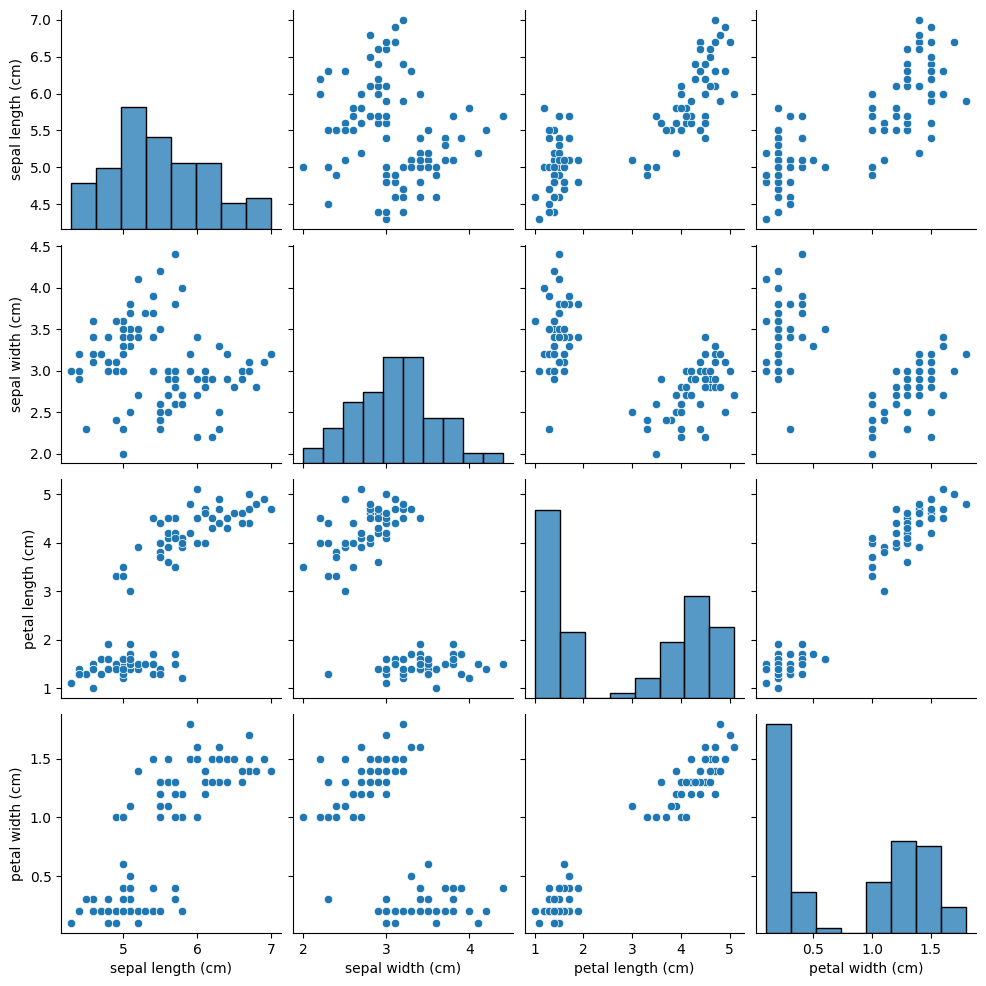

In [5]:
# Pairplot
sns.pairplot(iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
plt.show()

## Preprocessing the Data

In [6]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X = iris_data[['sepal length (cm)', 'sepal width (cm)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Applying K-means Clustering

<font size=3 color='red'><b>Task:</b></font>

Train a K-Means model on the scaled data (X_scaled). Add the resulting cluster labels to the original DataFrame in a column called 'KMeans_Cluster'.

In [7]:
from sklearn.cluster import KMeans

# Apply K-means with a predetermined number of clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)

# Add the cluster labels to the dataset
iris_data['KMeans_Cluster'] = kmeans.labels_

# Display the first few rows of the dataset with cluster labels
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,KMeans_Cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


<font size=3 color='red'><b>Task:</b></font>

Implement the Elbow Method to determine the optimal number of clusters for a K-Means model.

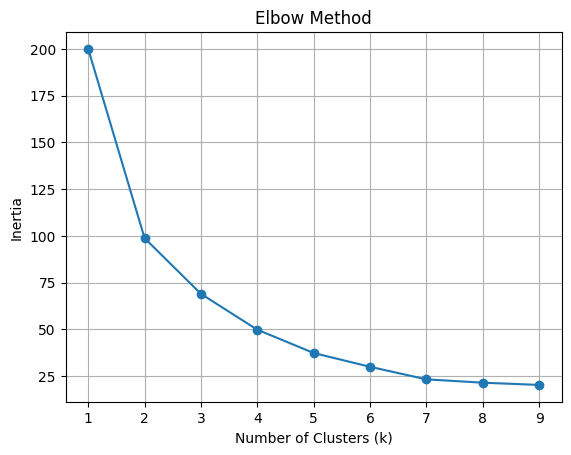

In [8]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()


<font size=3 color='red'><b>Task:</b></font>

Visualize the K-Means Clustering Results using a scatter plot. Follow these steps:

Plot the data points colored by their assigned cluster labels.
Mark the cluster centroids in the plot to visualize their positions.
Add appropriate labels, a legend, and a title to make the visualization clear.

In [28]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

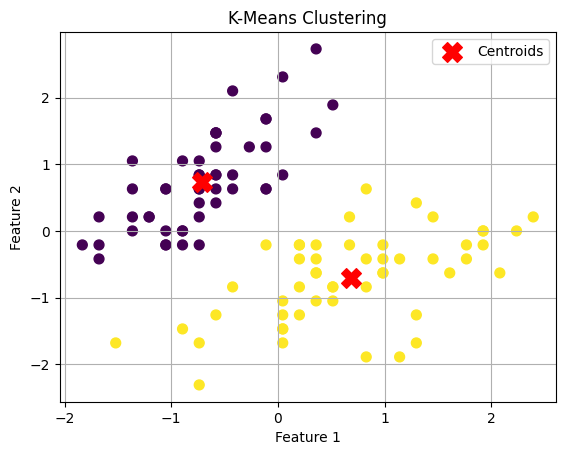

In [29]:
import matplotlib.pyplot as plt

# Scatter plot of the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


## Applying Agglomerative Clustering

<font size=3 color='red'><b>Task:</b></font>
Apply Agglomerative Clustering with a predetermined number of clusters. Add a new column, 'Agglomerative_Cluster', to the dataset.

In [10]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with a predetermined number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X_scaled)

# Add the cluster labels to the dataset
iris_data['Agglomerative_Cluster'] = agg_clustering.labels_

# Display the first few rows of the dataset with cluster labels
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,KMeans_Cluster,Agglomerative_Cluster
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1


<font size=3 color='red'><b>Task:</b></font> Experiment with Different Parameters for Agglomerative Clustering

Run Agglomerative Clustering with different parameter combinations:
n_clusters: [2, 3, 4]
linkage: ['ward', 'complete', 'average']

For each combination, print the number of clusters and visualize the clustering results.


n_clusters: 2, linkage: ward


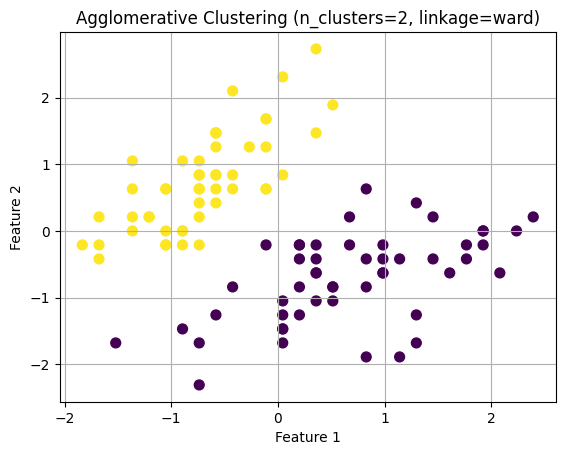

n_clusters: 2, linkage: complete


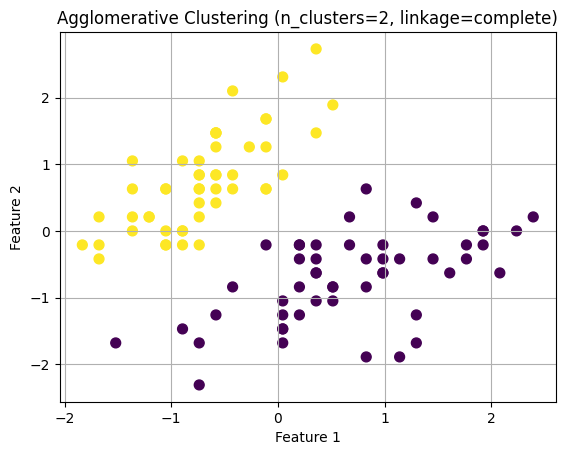

n_clusters: 2, linkage: average


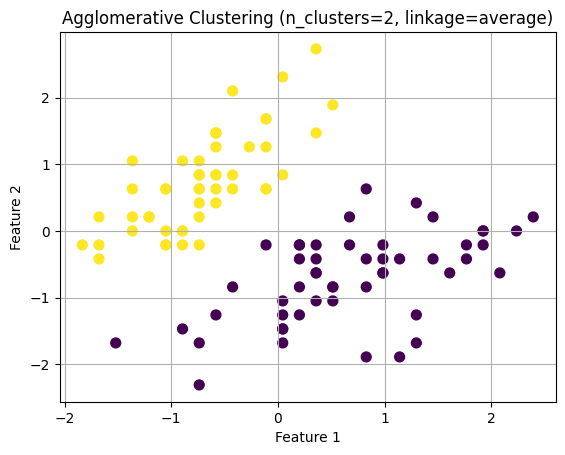

n_clusters: 3, linkage: ward


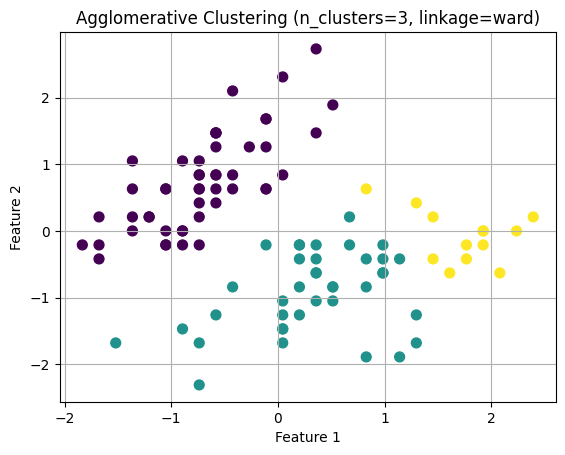

n_clusters: 3, linkage: complete


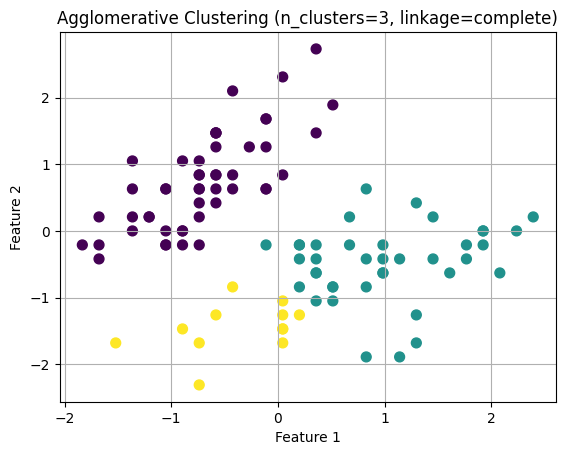

n_clusters: 3, linkage: average


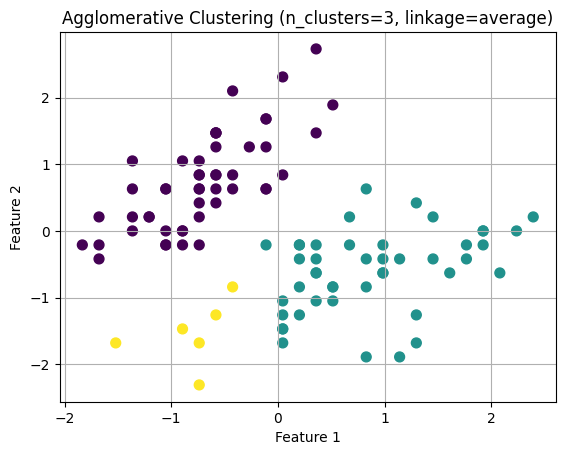

n_clusters: 4, linkage: ward


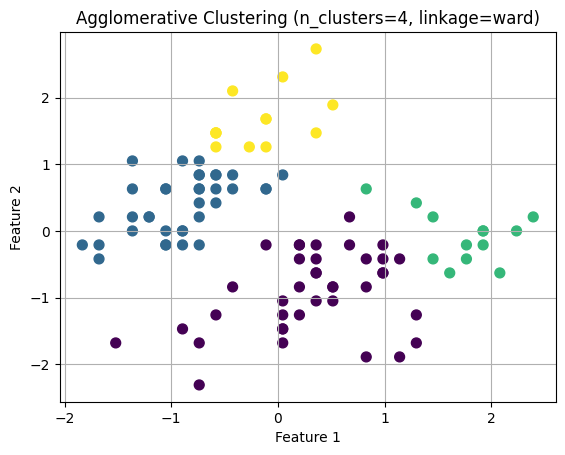

n_clusters: 4, linkage: complete


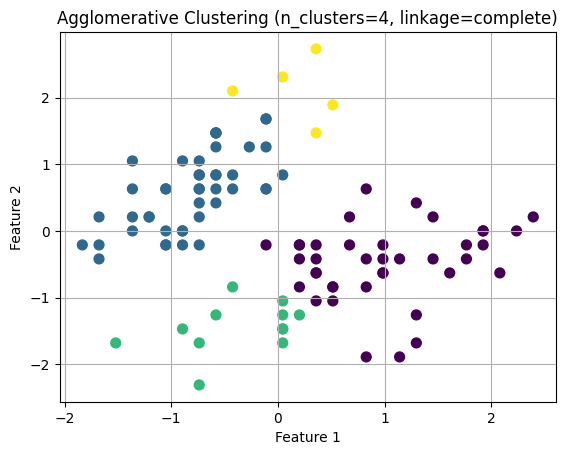

n_clusters: 4, linkage: average


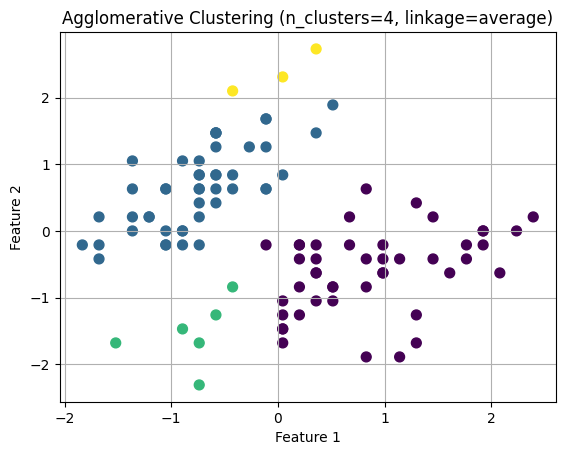

In [11]:
# Experiment with different parameters for Agglomerative Clustering
for n_clusters in [2, 3, 4]:
    for linkage in ['ward', 'complete', 'average']:
        # Apply Agglomerative Clustering
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        agglo_labels = agglo.fit_predict(X_scaled)

        # Print clustering information
        print(f"n_clusters: {n_clusters}, linkage: {linkage}")

        # Visualize clustering results
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='viridis', s=50)
        plt.title(f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage})")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.grid()
        plt.show()


<font size=3 color='red'><b>Step 3:</b></font> Generate a Dendrogram to Visualize the Hierarchical Structure
Use a dendrogram to explore the hierarchical relationships between data points.

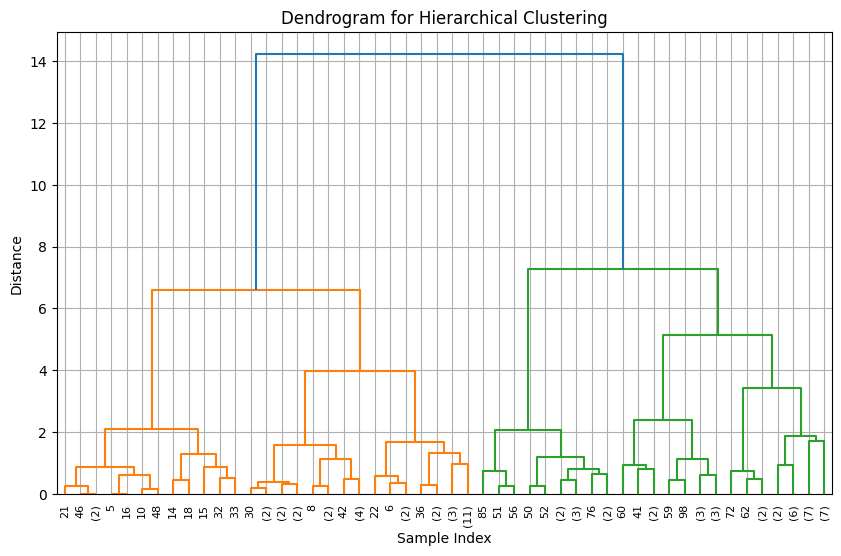

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix for dendrogram
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid()
plt.show()


## Applying DBSCAN Clustering

<font size=3 color='red'><b>Task:</b></font>

Now Use the DBSCAN algorithm to cluster the data. Add the resulting cluster labels to the original DataFrame in a column called  'DBSCAN_Cluster'.

In [13]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
# Note: eps and min_samples parameters need to be chosen based on the dataset characteristics
# Here we use some initial values that might be adjusted after further analysis
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Add the cluster labels to the dataset
iris_data['DBSCAN_Cluster'] = dbscan.labels_

# Display the first few rows of the dataset with DBSCAN cluster labels
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,KMeans_Cluster,Agglomerative_Cluster,DBSCAN_Cluster
0,5.1,3.5,1.4,0.2,0,0,1,0
1,4.9,3.0,1.4,0.2,0,0,1,0
2,4.7,3.2,1.3,0.2,0,0,1,0
3,4.6,3.1,1.5,0.2,0,0,1,0
4,5.0,3.6,1.4,0.2,0,0,1,0


<font size=3 color='red'><b>Task:</b></font>

Visualize DBSCAN Clustering:
Create a scatter plot to visualize the DBSCAN clusters and identify outliers. Use different colors for the clusters and highlight outliers.

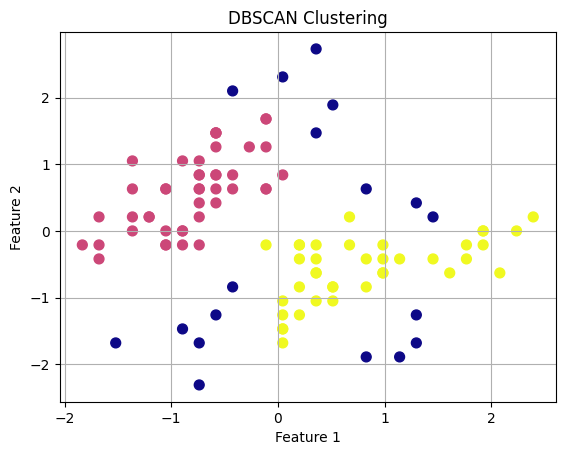

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()


<font size=3 color='red'><b>Task:</b></font>

Experiment with DBSCAN Parameters and Visualize Results:
Run the DBSCAN algorithm on the dataset using different combinations of eps (maximum distance for points to be in the same neighborhood) and min_samples (minimum number of points to form a cluster).

Iterate over the following values:
eps: [0.3, 0.5, 0.7]
min_samples: [3, 5, 10]
For each combination, print the number of clusters formed and plot the clustering result.

eps: 0.3, min_samples: 3, Number of clusters: 6


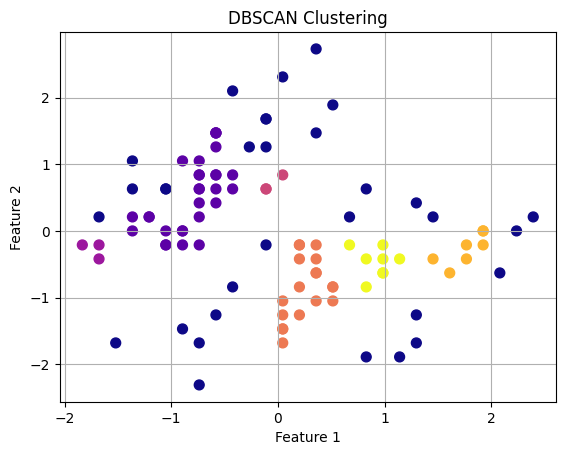

eps: 0.3, min_samples: 5, Number of clusters: 4


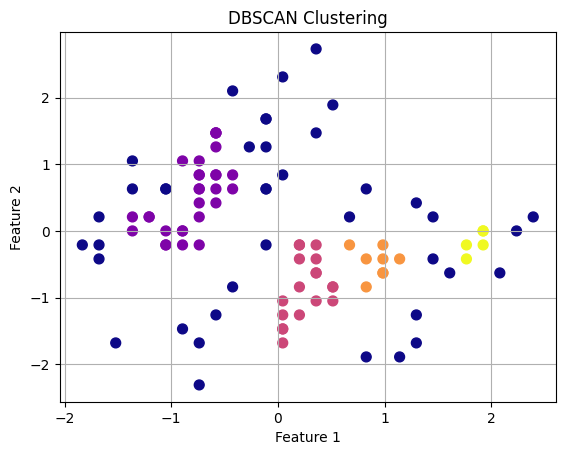

eps: 0.3, min_samples: 10, Number of clusters: 1


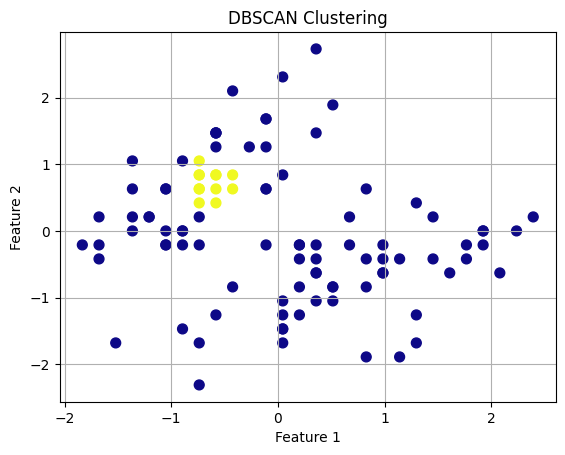

eps: 0.5, min_samples: 3, Number of clusters: 4


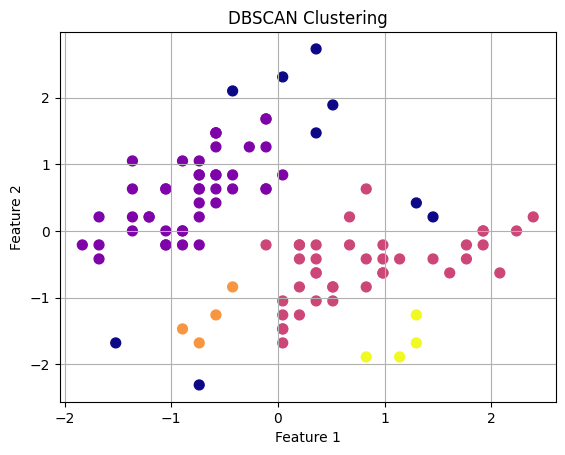

eps: 0.5, min_samples: 5, Number of clusters: 2


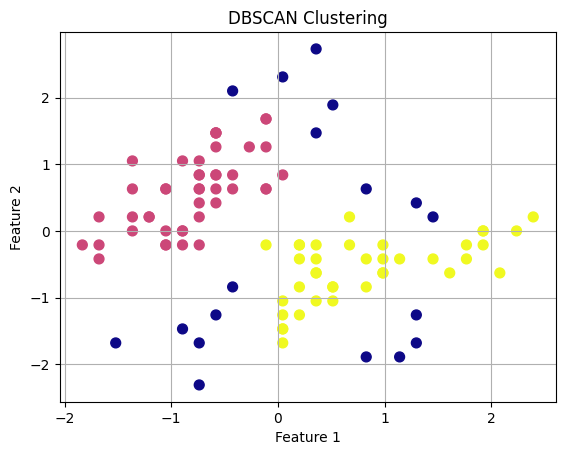

eps: 0.5, min_samples: 10, Number of clusters: 2


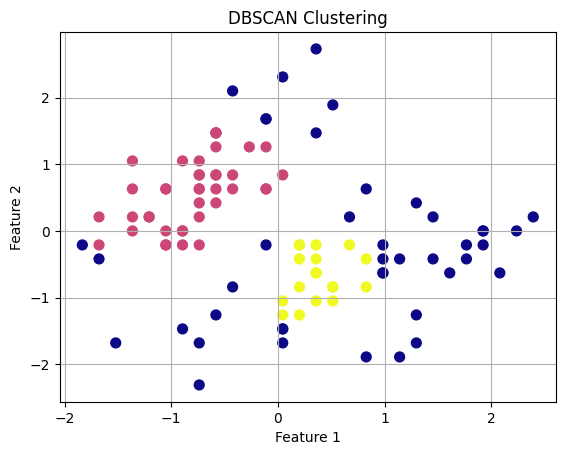

eps: 0.7, min_samples: 3, Number of clusters: 1


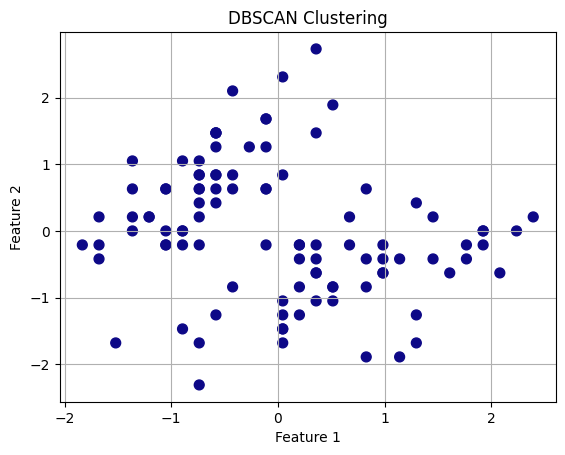

eps: 0.7, min_samples: 5, Number of clusters: 1


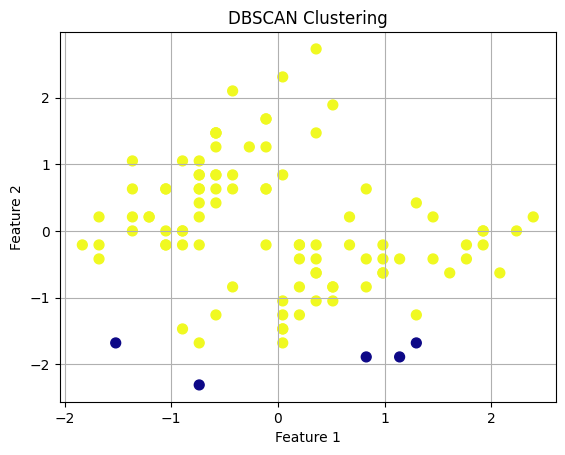

eps: 0.7, min_samples: 10, Number of clusters: 2


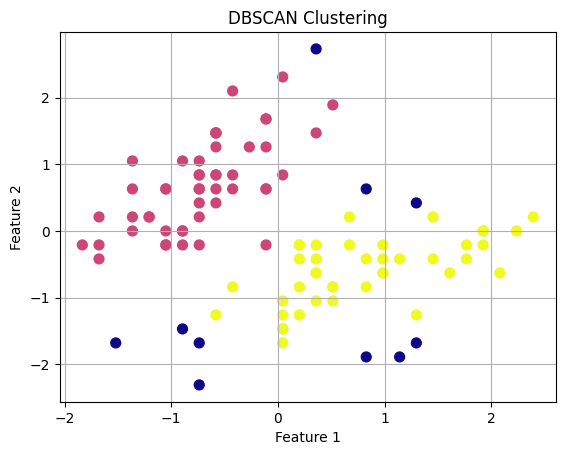

In [15]:
# Experiment with different parameters for DBSCAN
for eps in [0.3, 0.5, 0.7]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        print(f"eps: {eps}, min_samples: {min_samples}, Number of clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")

        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='plasma', s=50)
        plt.title("DBSCAN Clustering")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.grid()
        plt.show()


## Visualizing the Clusters

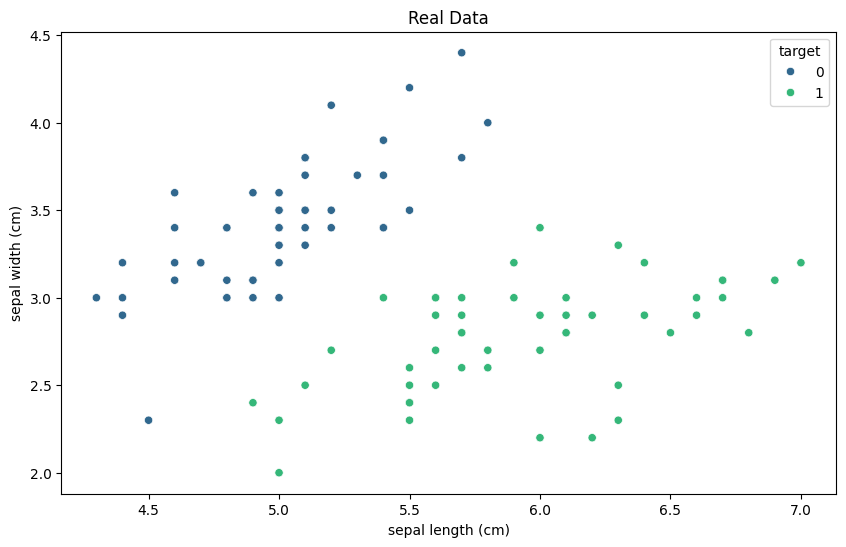

In [30]:
# Plot the clusters for the real target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=iris_data, palette='viridis')
plt.title('Real Data')
plt.show()

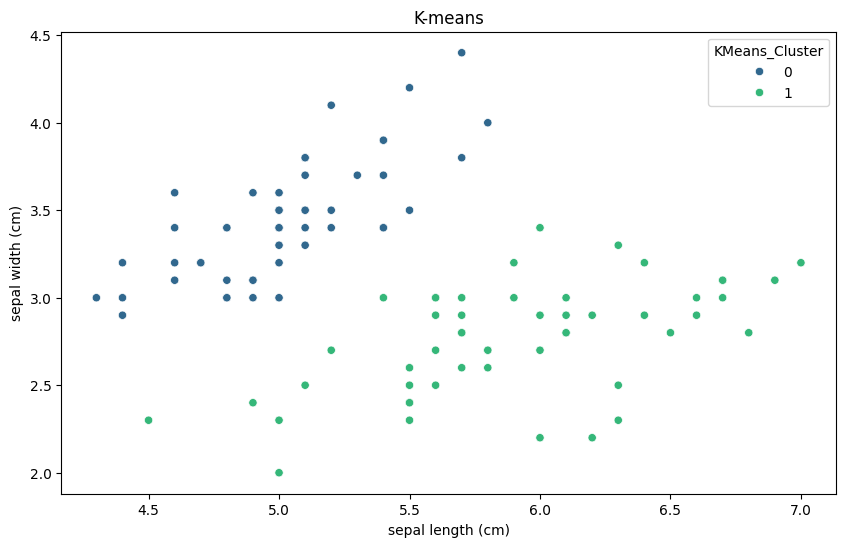

In [31]:
# Plot the clusters for K-means
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='KMeans_Cluster', data=iris_data, palette='viridis')
plt.title('K-means')
plt.show()

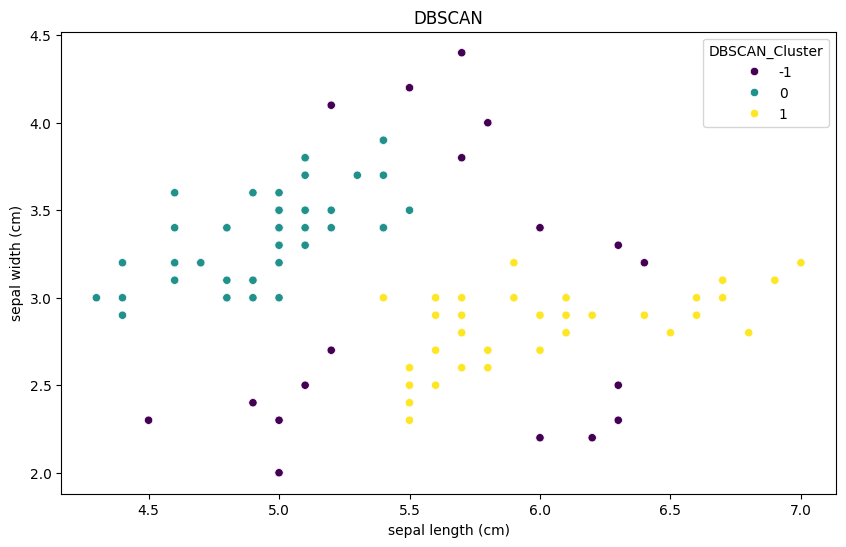

In [32]:
# Plot the clusters for DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='DBSCAN_Cluster', data=iris_data, palette='viridis')
plt.title('DBSCAN')
plt.show()

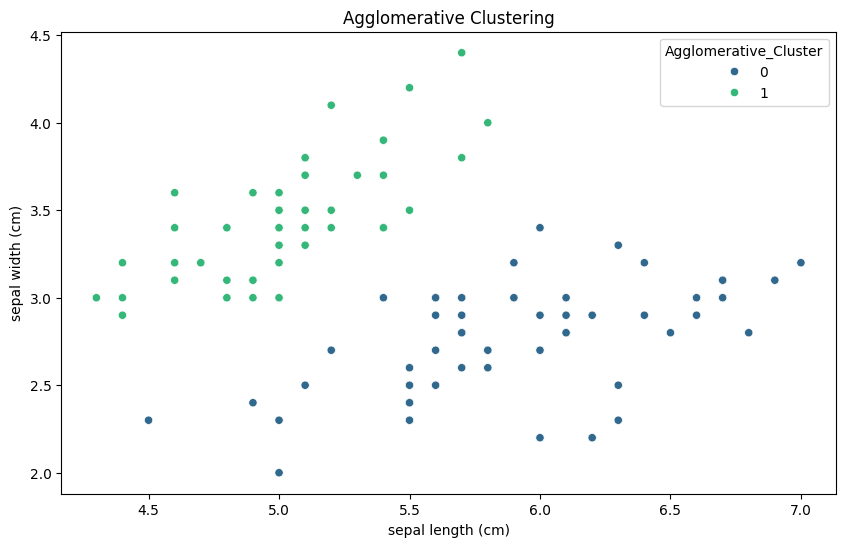

In [33]:
# Plot the clusters for Agglomerative Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Agglomerative_Cluster', data=iris_data, palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

## Evaluating the Clusters

<font size=3 color='red'><b>Step:</b></font> Evaluate the quality of your clustering models
For each clustering model (K-means, Agglomerative Clustering, DBSCAN):

- Calculate Silhouette Score to measure how well samples are clustered with their nearest neighbors.
- Calculate Davies-Bouldin Index (DBI) to evaluate the compactness and separation of the clusters.

In [34]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate the silhouette score for K-means
kmeans_silhouette_score = silhouette_score(X_scaled, kmeans.labels_)
print(f'K-means Silhouette Score: {kmeans_silhouette_score:.2f}')

# Calculate the silhouette score for Agglomerative Clustering
agg_silhouette_score = silhouette_score(X_scaled, agg_clustering.labels_)
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette_score:.2f}')

# Calculate the silhouette score for DBSCAN Clustering (may not work, assign -1 to outliers)
dbscan_silhouette_score = silhouette_score(X_scaled, dbscan.labels_)
print(f'DBSCN Clustering Silhouette Score: {dbscan_silhouette_score:.2f}')

# Calculate the silhouette score for K-means
kmeans_dbi_score = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f'K-means dbi Score: {kmeans_dbi_score:.2f}')

# Calculate the silhouette score for Agglomerative Clustering
agg_dbi_score = davies_bouldin_score(X_scaled, agg_clustering.labels_)
print(f'Agglomerative Clustering dbi Score: {agg_dbi_score:.2f}')

# Calculate the silhouette score for DBSCAN Clustering (may not work, assign -1 to outliers)
dbscan_dbi_score = davies_bouldin_score(X_scaled, dbscan.labels_)
print(f'DBSCN Clustering dbi Score: {dbscan_dbi_score:.2f}')

K-means Silhouette Score: 0.47
Agglomerative Clustering Silhouette Score: 0.47
DBSCN Clustering Silhouette Score: 0.41
K-means dbi Score: 0.85
Agglomerative Clustering dbi Score: 0.85
DBSCN Clustering dbi Score: 2.85


# Extra - Clustering for Recommendation Systems


## How Clustering is Applied in Recommendations:
  **Purpose**: Group similar users or items to provide personalized recommendations.
  **Relevance to Unsupervised Learning:** Uses clustering techniques to analyze unlabeled data, such as user preferences or item features.
  **Key Idea:** Users/items in the same cluster are assumed to have similar behaviors/preferences.

### Step 1: Data Preparation
1. Dataset: Use a matrix where:
- Rows = Users
- Columns = Items (e.g., movies, books)
- Values = Ratings or preferences.
2. Preprocessing:
- Fill missing values if needed (e.g., mean imputation).
- Standardize or normalize the data for clustering.

In [21]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example user-item matrix
data = {
    'User': [1, 2, 3, 4, 5, 6],
    'Item1': [5, 3, 0, 1, 4, 0],
    'Item2': [1, 2, 5, 4, 0, 0],
    'Item3': [3, 4, 1, 2, 5, 2],
    'Item4': [0, 1, 4, 5, 3, 1]
}
df = pd.DataFrame(data).set_index('User')

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


### Step 2: Clustering Users or Items
- Apply a clustering algorithm (e.g., K-Means, DBSCAN, or Agglomerative Clustering).
- Cluster users or items to group similar behaviors or features.

- Users/items in the same cluster can be recommended similar items/users.


In [22]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

print(df)  # Check the cluster assignments


      Item1  Item2  Item3  Item4  Cluster
User                                     
1         5      1      3      0        1
2         3      2      4      1        1
3         0      5      1      4        0
4         1      4      2      5        0
5         4      0      5      3        1
6         0      0      2      1        0


### Step 3: Making Recommendations
Logic: Recommend items popular in the user's cluster that they haven’t rated yet.



In [23]:
def recommend_items(user_id, df, top_n=2):
    # Get the user's cluster
    user_cluster = df.loc[user_id, 'Cluster']

    # Get items rated highly by users in the same cluster
    cluster_users = df[df['Cluster'] == user_cluster].drop(columns=['Cluster'])
    avg_ratings = cluster_users.mean()

    # Recommend top N items the user hasn't rated
    user_rated = df.loc[user_id].drop('Cluster')
    recommendations = avg_ratings[user_rated.isna()].sort_values(ascending=False).head(top_n)
    print("recommendations", recommendations)
    return recommendations

# Example: Recommend for User 1
recommend_items(1, df)


recommendations Series([], dtype: float64)


,0


In [24]:
recommend_items(3, df)


recommendations Series([], dtype: float64)


,0


### Step 4: Evaluate Recommendations

In [25]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.3547497308478675


### Step 5: Visualizing Clusters
Use PCA to reduce dimensions and visualize clusters.


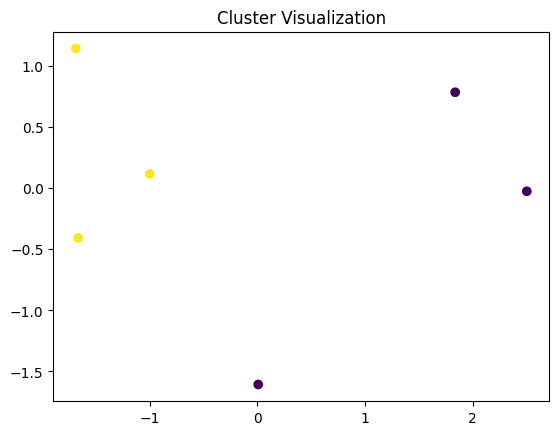

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Cluster Visualization')
plt.show()
